In [1]:
# import necessary libraries
import pandas as pd
#from IPython.display import display
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv') # read csv int a df
df.rename(columns={'Unnamed: 0': 'Year'}, inplace = True) # rename column 'Unnamed: 0'
df.dropna(inplace = True) # Drop null values 
df['Date'] = pd.to_datetime(df['Year'], format='%Y') # set datetime set on the year
df.set_index('Date', inplace=True) # Set the 'Year' column as the index
df = df.drop(columns=['Year']) # drop Year column

In [3]:
# read labels file to dictionary
with open('stata_dict.txt', 'r') as file:
        stata_vals_dict = eval(file.read())  # Use eval carefully for trusted input
        print(stata_vals_dict)

# create appropreate labels for the needs of my analyses

jrc_labels = list(df.columns) # save existing labels
stata_labels = list({k:v[1] for k, v in stata_vals_dict.items()}.values()) # create stata labels
#stata_labels.insert(0, 'Year') # insert year label
complete_labels = list({k:v[0] for k, v in stata_vals_dict.items()}.values()) # create complete labels
#complete_labels.insert(0, 'Year')


{'SOVGDE': ['Real labour productivity per person employed', 'realLabourProductivityPerPerso'], 'SNETD': ['Total Employment (workplace based, employed persons)', 'totalEmploymentWorkplaceBasedE'], 'SNPTD': ['Average annual population', 'averageAnnualPopulation'], 'SUVGD': ['GDP at current market prices', 'gdpAtCurrentMarketPrices'], 'RUWCD': ['Compensation of employees at current prices', 'compensationOfEmployeesAtCurre'], 'RUYNH': ['Current taxes on income and wealth', 'currentTaxesOnIncomeAndWealth'], 'RUIGT': ['Gross Fixed Capital Formation at current prices', 'grossFixedCapitalFormationAtCu'], 'ROKND': ['Capital Stock at constant prices', 'capitalStockAtConstantPrices'], 'RPDNN': ['Early leavers from education and training', 'earlyLeaversFromEducationAndTr']}


In [4]:
complete_labels

['Real labour productivity per person employed',
 'Total Employment (workplace based, employed persons)',
 'Average annual population',
 'GDP at current market prices',
 'Compensation of employees at current prices',
 'Current taxes on income and wealth',
 'Gross Fixed Capital Formation at current prices',
 'Capital Stock at constant prices',
 'Early leavers from education and training']

In [5]:
labels = ["Productivity", 
          "Employment", 
          "Population", 
          "Gdp", 
          "Compensation", 
          "TaxesIncomeWealth", 
          "CapitalFormation", 
          "CapitalStock",
          "earlyLeavers"]

In [6]:
# display correlation
df.columns = labels
mat = df.corr(method = "spearman").round(2)

mat.style.background_gradient(cmap = "RdYlGn").format("{:.2f}")

,Productivity,Employment,Population,Gdp,Compensation,TaxesIncomeWealth,CapitalFormation,CapitalStock,earlyLeavers
Productivity,1.00,-0.28,-0.84,-0.69,-0.72,0.51,0.12,-0.66,-0.77
Employment,-0.28,1.00,0.29,0.75,0.73,-0.05,0.79,0.35,-0.08
Population,-0.84,0.29,1.00,0.71,0.71,-0.31,-0.03,0.85,0.80
Gdp,-0.69,0.75,0.71,1.00,0.97,-0.49,0.31,0.53,0.54
Compensation,-0.72,0.73,0.71,0.97,1.00,-0.53,0.30,0.58,0.57
TaxesIncomeWealth,0.51,-0.05,-0.31,-0.49,-0.53,1.00,0.41,0.10,-0.61
CapitalFormation,0.12,0.79,-0.03,0.31,0.30,0.41,1.00,0.26,-0.51
CapitalStock,-0.66,0.35,0.85,0.53,0.58,0.10,0.26,1.00,0.50
earlyLeavers,-0.77,-0.08,0.80,0.54,0.57,-0.61,-0.51,0.50,1.00


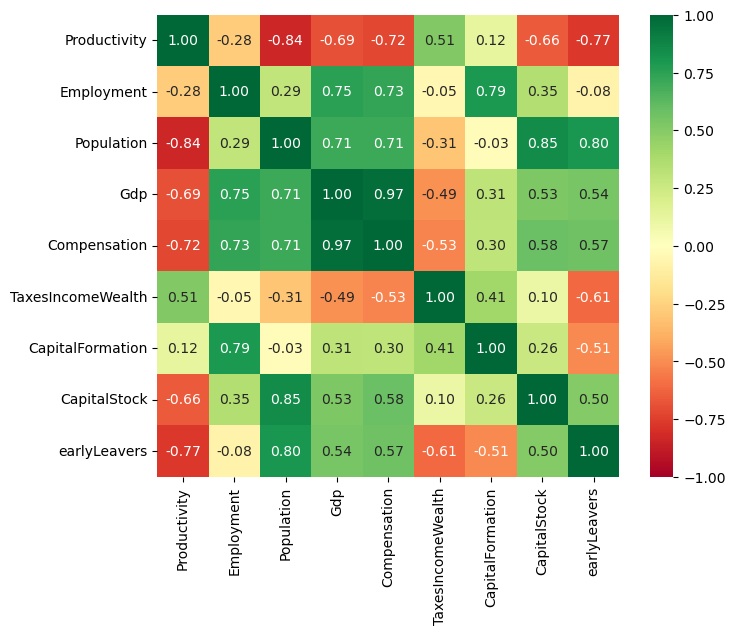

In [7]:
# display correlation
df.columns = labels
mat = df.corr(method = "spearman").round(2)
plt.figure(figsize = (8,6)) # width, height
sns.heatmap(mat, cmap = "RdYlGn", vmin = -1, vmax = 1, annot = True, square = True, fmt = "0.2f")
plt.show()

In [8]:
jrc_labels

['SOVGDE',
 'SNETD',
 'SNPTD',
 'SUVGD',
 'RUWCD',
 'RUYNH',
 'RUIGT',
 'ROKND',
 'RPDNN']

In [9]:
# display correlation
df.columns = jrc_labels
mat = df.corr(method = "spearman").round(2)

mat.style.background_gradient(cmap = "RdYlGn").format("{:.2f}")

,SOVGDE,SNETD,SNPTD,SUVGD,RUWCD,RUYNH,RUIGT,ROKND,RPDNN
SOVGDE,1.00,-0.28,-0.84,-0.69,-0.72,0.51,0.12,-0.66,-0.77
SNETD,-0.28,1.00,0.29,0.75,0.73,-0.05,0.79,0.35,-0.08
SNPTD,-0.84,0.29,1.00,0.71,0.71,-0.31,-0.03,0.85,0.80
SUVGD,-0.69,0.75,0.71,1.00,0.97,-0.49,0.31,0.53,0.54
RUWCD,-0.72,0.73,0.71,0.97,1.00,-0.53,0.30,0.58,0.57
RUYNH,0.51,-0.05,-0.31,-0.49,-0.53,1.00,0.41,0.10,-0.61
RUIGT,0.12,0.79,-0.03,0.31,0.30,0.41,1.00,0.26,-0.51
ROKND,-0.66,0.35,0.85,0.53,0.58,0.10,0.26,1.00,0.50
RPDNN,-0.77,-0.08,0.80,0.54,0.57,-0.61,-0.51,0.50,1.00


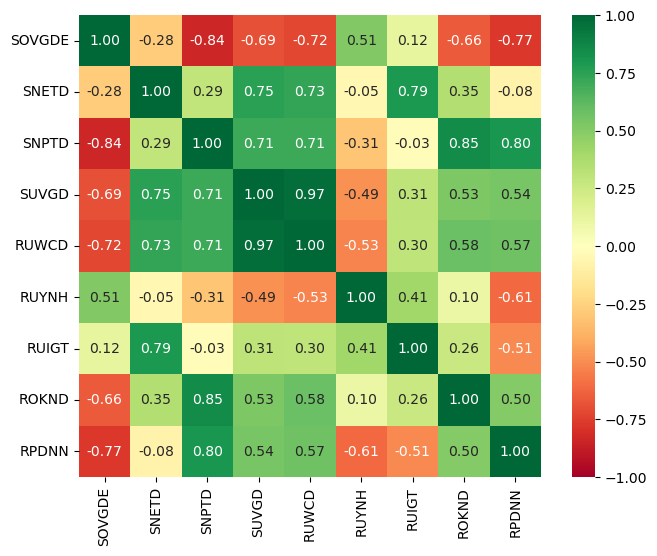

In [10]:
# display correlation
df.columns = jrc_labels
mat = df.corr(method = "spearman").round(2)
plt.figure(figsize = (8,6)) # width, height
sns.heatmap(mat, cmap = "RdYlGn", vmin = -1, vmax = 1, annot = True, square = True, fmt = "0.2f")
plt.show()

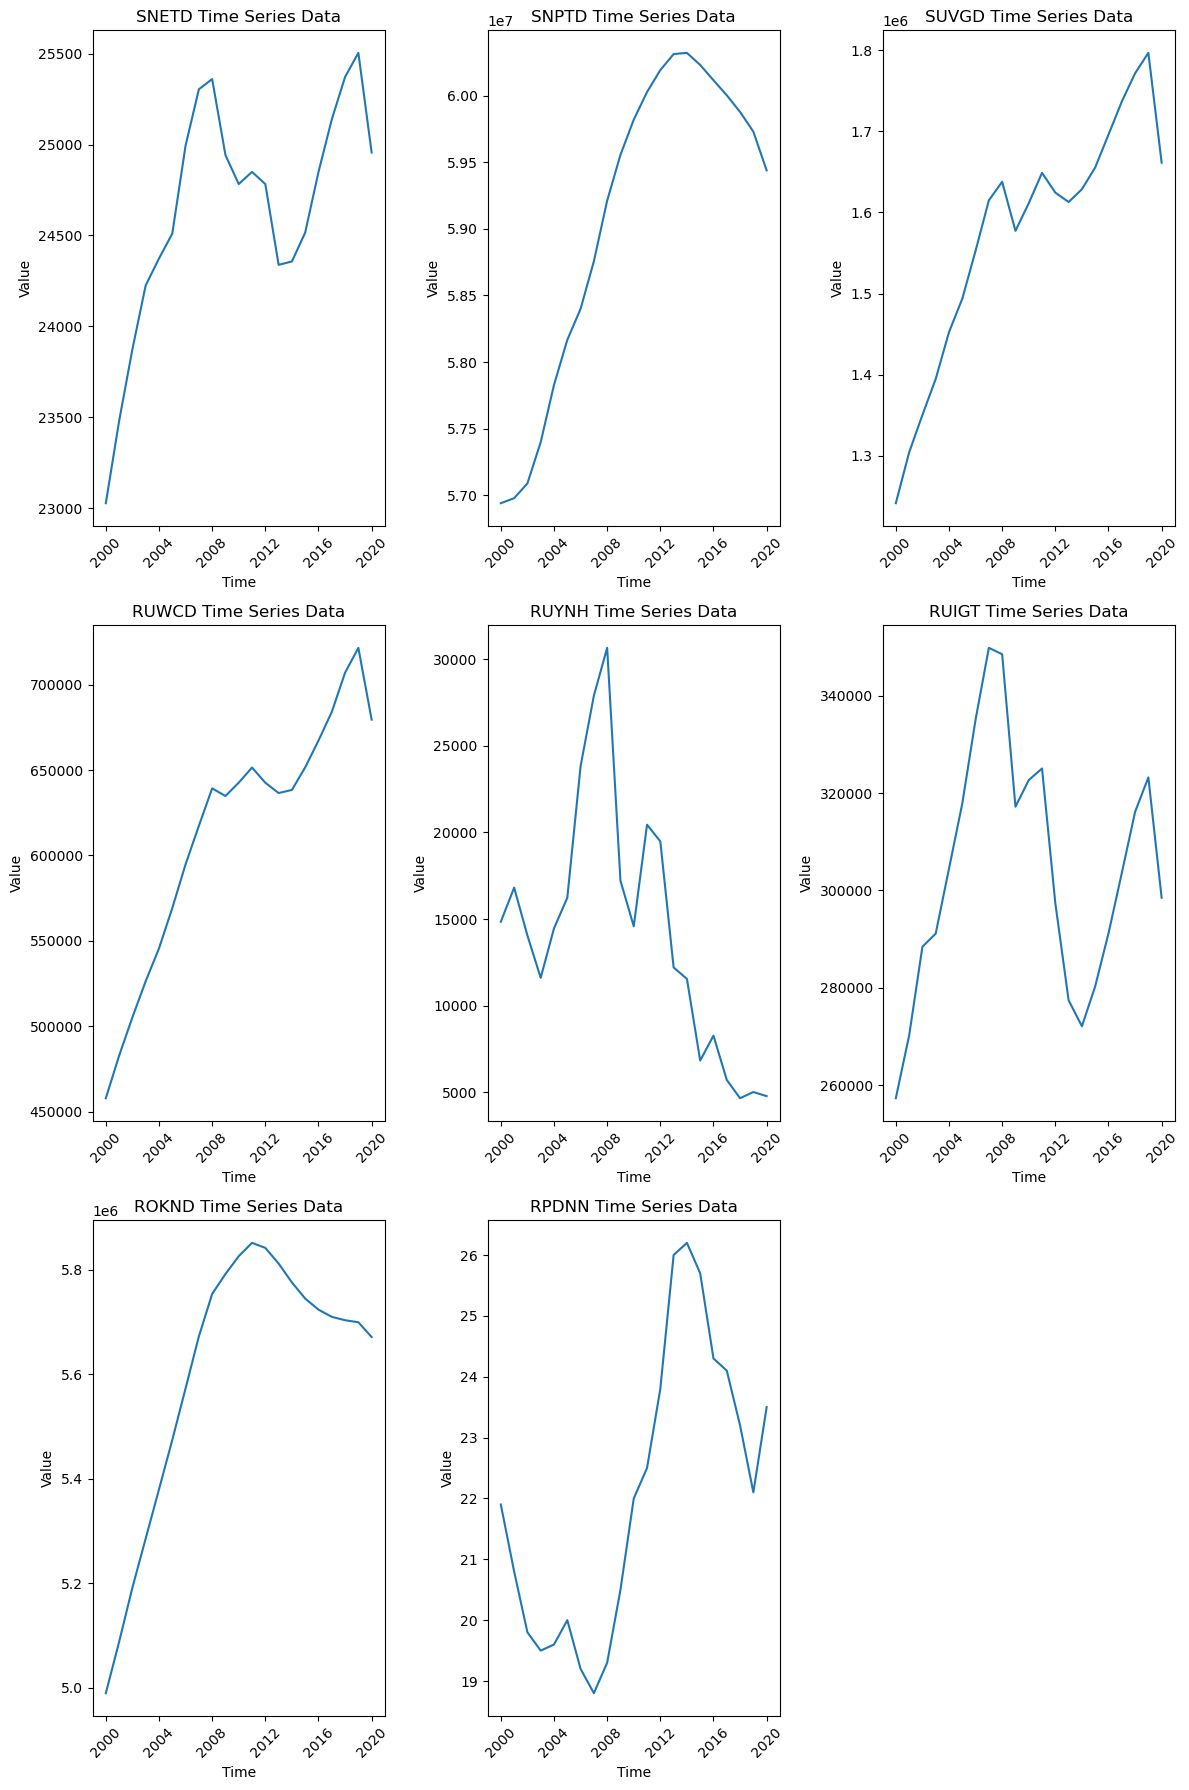

In [11]:
# Number of columns in the plot grid
cols = 3

# Number of rows needed based on the number of columns in df
rows = (len(df.columns) - 1) // cols + 1  # Minus 1 to exclude the first column (time or index column)

# Create the subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and plot each on a separate subplot
for idx, val in enumerate(df.columns[1:]):
    ax = axes[idx]  # Select the appropriate subplot
    ax.plot(df.index, df[val])
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(val + ' Time Series Data')
    ax.tick_params(axis='x', rotation=45)

# Remove any extra subplots (if there are more subplots than columns)
for idx in range(len(df.columns) - 1, len(axes)):
    fig.delaxes(axes[idx])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()